## 21D008 Probabilistic Inference - Project: Elliptical Slice Sampling in Classification

In [57]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.random import multivariate_normal as mn
from gpc import *
from EllipticalSliceSampler import EllipticalSampler
from utils import (
    plot_sampler,
    plot_multiple
)
np.random.seed(42)

In [58]:
prior_µ = np.array([1,2])
prior_Σ = np.array(
    [[ 2.58319407, -0.67001488],
    [-0.67001488,  1.09846023]]
)

lik_µ = np.array([0,0])
lik_Σ = np.array(
    [[ 1.80406008, -1.01247719],
    [-1.01247719,  1.34016259]]
)

loglik = lambda f: np.log(multivariate_normal.pdf(f, mean=lik_µ, cov=lik_Σ))
f_incumbent = mn(prior_µ - prior_µ, prior_Σ, size=1).squeeze()

nu = mn(prior_µ - prior_µ, prior_Σ, size=1)
log_y = loglik(f_incumbent) + np.log(np.random.uniform(0,1))
Θ = np.random.uniform(0 + sys.float_info.min, 2*np.pi)
Θ_min, Θ_max = Θ - 2*np.pi, Θ

In [59]:
f_candidate = (f_incumbent * np.cos(Θ) + nu * np.sin(Θ)).squeeze()

In [60]:
Θ_space = np.linspace(0,2*np.pi,100)

In [61]:
pointy = np.stack([(f_incumbent * np.cos(x) + nu * np.sin(x)).squeeze() for x in Θ_space])

In [62]:
f_candidate

array([-0.89048893,  1.50953396])

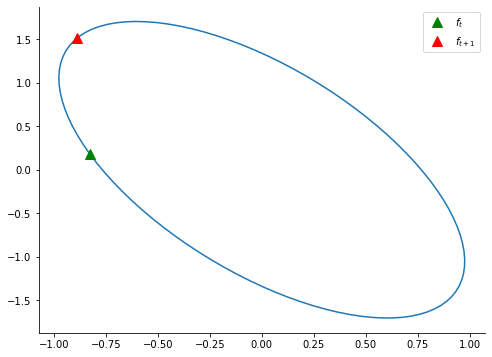

In [63]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(pointy[:,0], pointy[:,1])
ax.plot(f_incumbent[0], f_incumbent[1], 'g^', markersize=10, label="$f_t$")
ax.plot(f_candidate[0], f_candidate[1], 'r^', markersize=10, label="$f_{t+1}$")
ax.legend(loc="upper right")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Toy Example: GPC

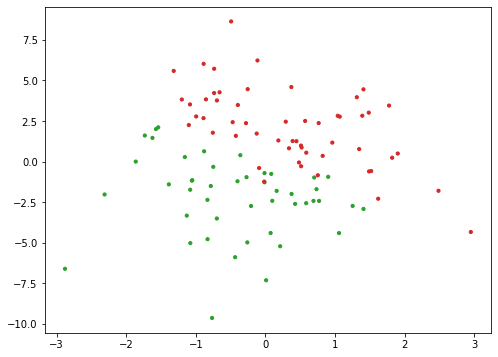

In [70]:
X1 = np.random.standard_normal(size=100)
X2 = np.random.normal(0,3,size=100)
X = np.dstack((X1,X2)).squeeze()
Y = np.where(0.5*X1 + 0.3*X2 + np.random.normal(0,0.2,100) > 0, 1, 0)

fig, ax = plt.subplots(1,1,figsize=(8,6))
plt.scatter(x=X[:,0], y=X[:,1], s=10, c=np.where(Y>0, "tab:red", "tab:green"))

In [71]:
train_X, train_Y = X[:80,:], Y[:80]
test_X, test_Y = X[80:,:], Y[80:]

In [72]:
gpc = GPC(kernel=gaussian_kernel, hyperparameters=[1,1])
gpc.X, gpc.Y = train_X, train_Y

In [73]:
y_pred, var_pred = gpc.predict(test_X)
prob_pred = GPC._sigmoid(y_pred)

In [74]:
from matplotlib import colors
cmap=colors.LinearSegmentedColormap.from_list('rg',["tab:green", "tab:red"], N=256)

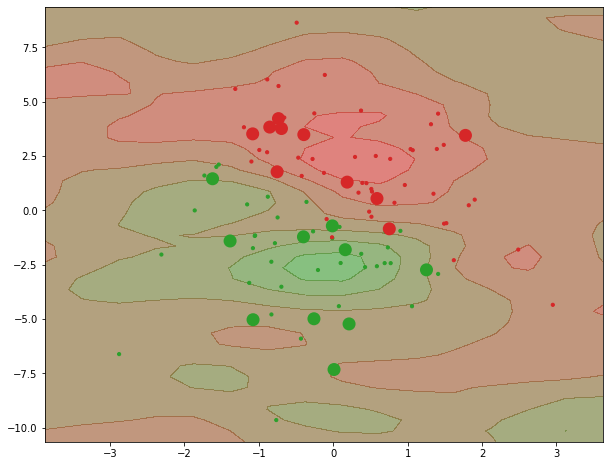

In [75]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.5),
    np.arange(y_min, y_max, 0.5)
)

Z = gpc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z[0].reshape(xx.shape)

fig, ax = plt.subplots(1,1,figsize=(10,8))
train_cmap = np.where(train_Y>0, "tab:red", "tab:green")
test_cmap = np.where(test_Y>0, "tab:red", "tab:green")
pred_cmap = np.where(prob_pred>0.5, "tab:red", "tab:green")
ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.6)
ax.scatter(x=train_X[:,0], y=train_X[:,1], s=10, c=train_cmap)
ax.scatter(x=test_X[:,0], y=test_X[:,1], s=100, c=test_cmap, edgecolors=pred_cmap, linewidth=3)

In [55]:
len(prob_pred)

80